# Dimensionality Reduction
### Aim: To analyse the accuracy of the model with and without Dimensionality Reduction.
### Dataset: Diabetes
### Source: Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv("diabetes (2).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


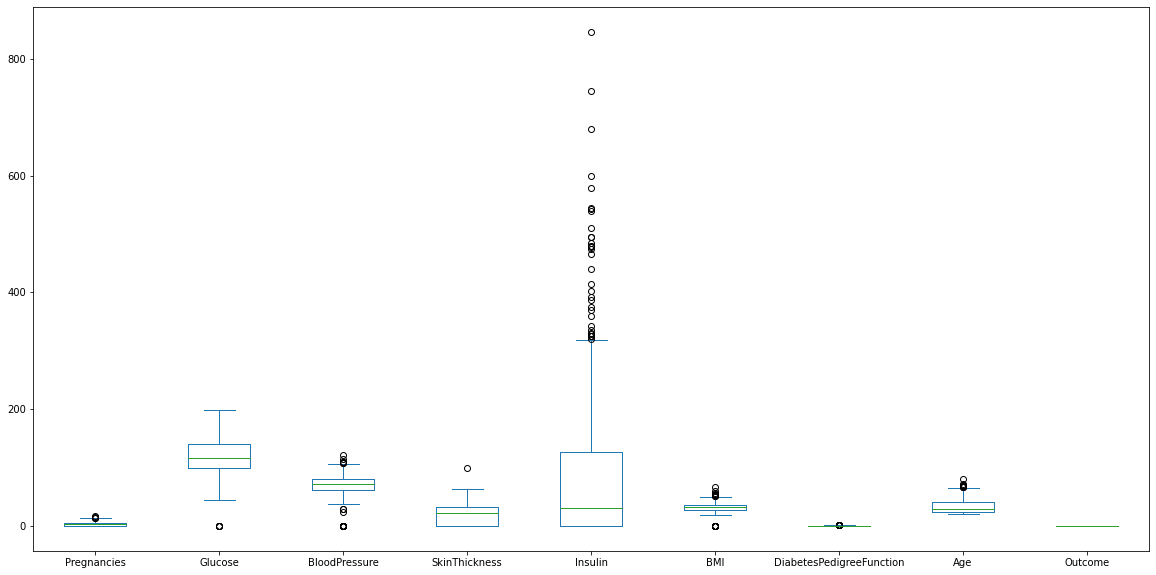

In [ ]:
data.plot(kind="box",figsize =(20,10))

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of Insulin:  2.2678104585131753


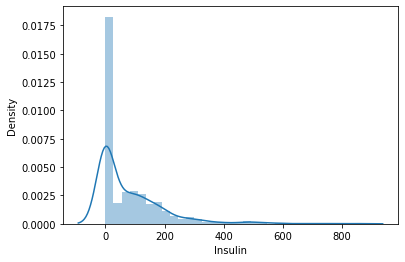

In [ ]:
# Probability Distribution of the Insulin
sns.distplot(data["Insulin"])
# The graph indicates that its a right skewed data

from scipy.stats import skew
print("Skewness of Insulin: ",skew(data["Insulin"]))

In [ ]:
P25 = data["Insulin"].quantile(0.25)
P75 = data["Insulin"].quantile(0.75)
print(P25,P75)
upper = P75 + 1.5*(P75-P25)
lower = P25 - 1.5*(P75-P25)
print(upper,lower)

0.0 127.25
318.125 -190.875


In [ ]:
# Capping
new_data = data.copy()
new_data["Insulin"]=np.where(new_data["Insulin"]>upper,upper,
                               np.where(new_data["Insulin"]<lower,lower,
                                        new_data["Insulin"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

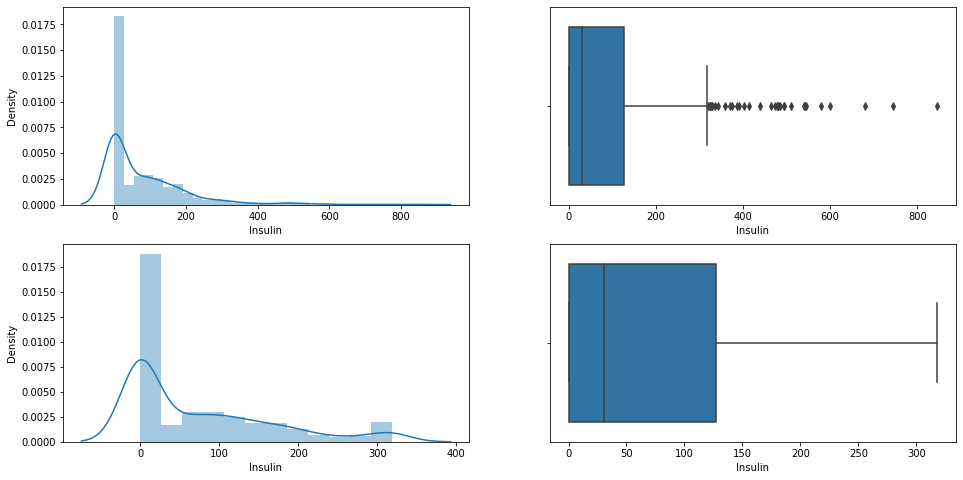

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Insulin"])
plt.subplot(2,2,2)
sns.boxplot(data["Insulin"])
plt.subplot(2,2,3)
sns.distplot(new_data["Insulin"])
plt.subplot(2,2,4)
sns.boxplot(new_data["Insulin"])
plt.show()

In [ ]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Without applying PCA

In [ ]:
#Without
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Reg = LogisticRegression()
Reg.fit(x_train,y_train)
y_pred = Reg.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7792207792207793
CPU times: user 10 ms, sys: 86 µs, total: 10.1 ms
Wall time: 11.3 ms


In [ ]:
y_train_hat =Reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset without PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset without PCA is: 76.3501 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


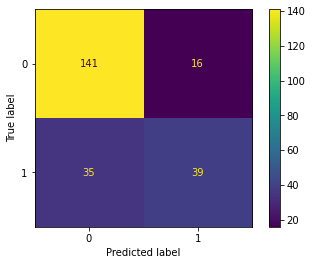

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Reg, x_test,y_test)

Applying PCA to the data

In [ ]:
#With
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test = pca.transform(x_test)


classifier2 = LogisticRegression()
classifier2.fit(x_train,y_train)
y_pred2 = classifier2.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred2))

Accuracy:  0.7359307359307359
CPU times: user 13 ms, sys: 2.1 ms, total: 15.1 ms
Wall time: 14.7 ms


In [ ]:
y_train_hat =classifier2.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 70.9497 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


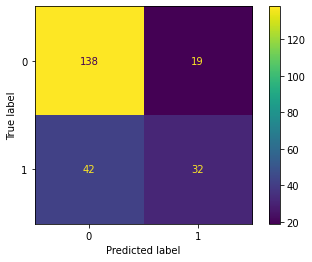

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier2, x_test,y_test)

In [ ]:
principalDf = pd.DataFrame(data = x_train, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data[['Outcome']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Outcome
0,1.430207,-1.273974,1
1,-2.218936,-0.575093,0
2,-0.070861,-0.658399,1
3,0.221573,2.533708,0
4,-0.710895,0.862986,1


Text(0, 0.5, 'pc2')

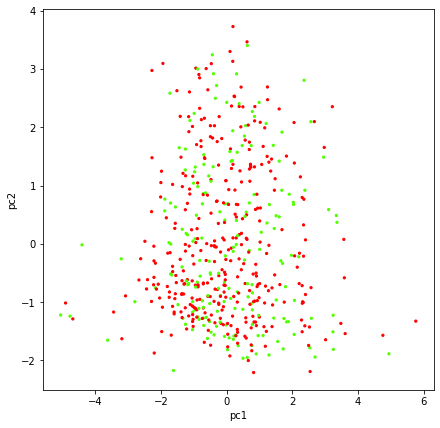

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['Outcome'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

The diabetes dataset consisted of 9 features. When we built the Logistic Regression model without performing PCA,the accuracy of the model was 77% and the execution time is 22.7ms. But when we reduced the dimensions of the data by performing PCA and built a Logistic model, the accuracy was 73% and the execution time is 16.8ms. Thus, we can say that execution time of the training process can be reduced with the help of PCA and also we can easily visualize the high dimensional data.

But in General, without PCA, the model may be prone to overfitting resulting in high test error and low train error. We can reduce this overfitting with the help of PCA. But the model trained here without PCA and PCA was a balanced model.